### 2021_10_18_4

## 비지도 학습과 데이터 전처리

### 학습 내용
* 1. 비지도 학습의 종류에 대해 알아본다.
* 2. 데이터 전처리와 스케일 조정에 대해 알아본다.

### 비지도 학습이란?
* 우리가 예측해야 하는 값(target)의 출력값이 없이 입력 데이터 만을 이용하여 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝

### 비지도 학습의 종류
* 비지도 변환(unsupervised transformation)
* 군집(clustering)

### 비지도 변환(unsupervised transformation)
* 비지도 변환은 데이터를 새롭게 표현하여,
* 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘이다.
* 사용 분야
    * 많이 사용되는 분야는 특성이 많은 고차원 데이터의 특성(feature)의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소(dimensionality reduction)이다.
* 소셜 미디어에서 선서, 총기, 팝스타 같은 주제로 일어나는 토론을 추적, 텍스트 문서에서 주제를 추출

### 군집 알고리즘(Clustering)
* 데이터를 비슷한 것끼리 그룹으로 묶는 것이다.

### 데이터 전처리와 스케일 조정
* 신경망과 서포트벡터 머신(SVM)같은 알고리즘은 데이터 스케일(범위)에 매우 민감하다.
* 이런 알고리즘에 맞게 특성(feature)를 조정한다. 각 feature별로 변경한다.

### StandardScaler - 표준화
* 각 특성(feature)의 평균을 0, 분산을 1로 변경한다.
* 이 방법은 feature(특성)의 최솟값과 최댓값 크기를 제한하지 않는다.

### RobustScaler
* 같은 스케일을 갖는다. StandardScaler와 비슷하다.
* 이 방법은 평균과 분산 대신 중간값(median)과 사분위 값(quantile)을 사용한다.
* 중앙값을 선택하므로 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않는다.

### MinMaxScaler 
* 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경한다.

### Normalizer - 정규화
* 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다.
* 지름이 1인 원에 데이터 포인트를 투영한다.
* 정규화는 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 많이 사용한다.

### 스케일링의 목적
* 표준화된 스케일로 각 특징을 다시 표현하여 너무 큰 값으로 인한 잠재적인 수치 불안전성을 방지한다.

In [1]:
import mglearn

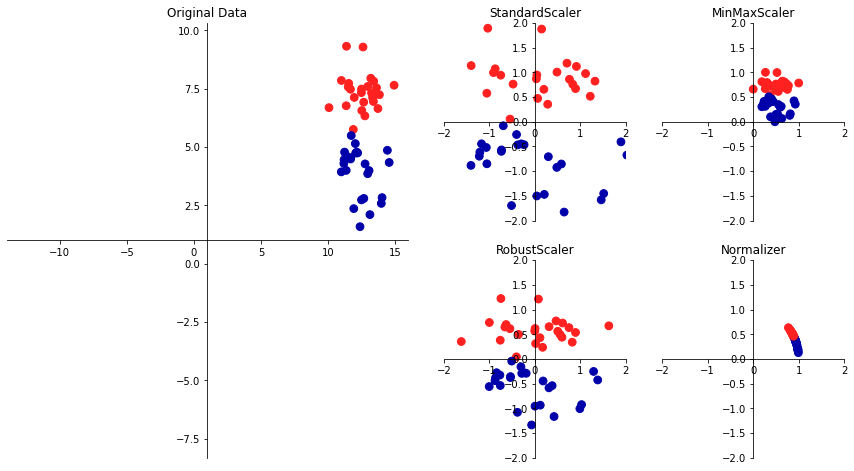

In [3]:
mglearn.plots.plot_scaling()

In [4]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system()== "Darwin":
    rc('font', family = 'AppleGothic')
else:
    print("Unknown System")

### 데이터 변환 실습
* 데이터 셋 : cancer 데이터(569개, 30열)

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("[cancer.key()] \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

[cancer.key()] 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 형태 : (569, 30)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify = cancer.target,
                                                   random_state = 77)
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape : (426, 30)
X_test shape : (143, 30)


### MinMaxScaler 이용

In [9]:
import numpy as np
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

print("변환 전 크기 : {}".format(X_train.shape))
print("변환전 최대, 최소 : \n {}, {}".format(X_train.max(axis=0), 
                                      X_train.min(axis=0)))
print()
print("변환 후 크기 : {}".format(X_train_s.shape))
print("변환후 최대, 최소 : \n {}, {}".format(X_train_s.max(axis=0), 
                                      X_train_s.min(axis=0)))

변환 전 크기 : (426, 30)
변환전 최대, 최소 : 
 [28.110 39.280 188.500 2499.000 0.145 0.345 0.427 0.201 0.304 0.096 2.873
 4.885 21.980 525.600 0.031 0.106 0.396 0.053 0.079 0.030 33.120 47.160
 220.800 3432.000 0.223 1.058 1.252 0.291 0.577 0.207], [7.691 10.380 47.920 170.400 0.053 0.019 0.000 0.000 0.106 0.050 0.117
 0.360 0.771 7.254 0.002 0.002 0.000 0.000 0.008 0.001 8.678 12.490 54.490
 223.600 0.071 0.027 0.000 0.000 0.157 0.055]

변환 후 크기 : (426, 30)
변환후 최대, 최소 : 
 [1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000], [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000]


### 변환 전후, 시각화

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

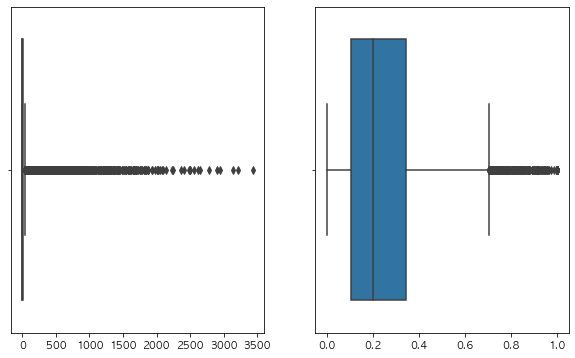

In [15]:
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.subplot(1, 2, 2)
sns.boxplot(X_train_s)

### 메서드 단축해서 사용 가능
* fit, transform -> fit_transform 메서드 사용하기

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 같은 내용 다른 방법
X_train_scaler = scaler.fit(X_train).transform(X_train)
X_train_scaler_d = scaler.fit_transform(X_train)

### fit().transform()과 fit_transform()과 같다.
print("변경전 :", X_train.max(), X_train.min())
print("변경후 :", X_train_scaler.max(), X_train_scaler.min())
print("변경후 :", X_train_scaler_d.max(), X_train_scaler_d.min())

변경전 : 3432.0 0.0
변경후 : 11.587694680416146 -3.0966340529458245
변경후 : 11.587694680416146 -3.0966340529458245


/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

<AxesSubplot:>

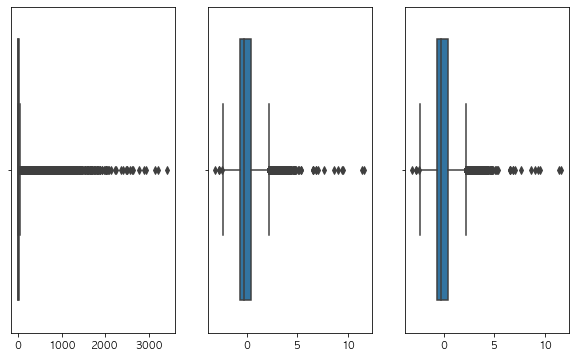

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(X_train, ax=axes[0])
sns.boxplot(X_train_scaler, ax=axes[1])
sns.boxplot(X_train_scaler_d, ax=axes[2])

### 학습용 데이터 셋과 테스트 데이터 셋은 같은 스케일을 적용해야 한다.

In [18]:
from sklearn.datasets import make_blobs

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# 학습용 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

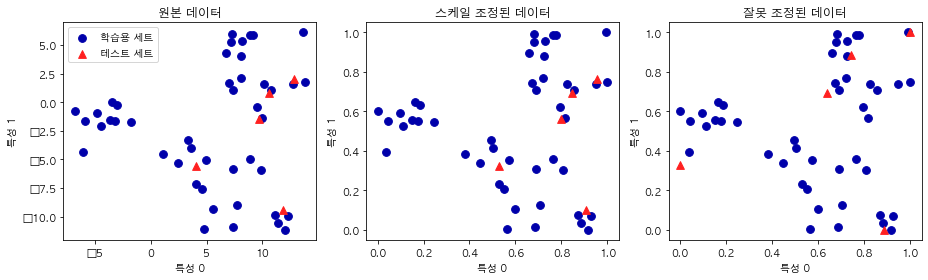

In [19]:
# 학습용 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

* 첫번째 그래프 - 원본 데이터
* 두번째 그래프 - 정상
* 세번째 그래프 - 각각 train, test에 대해서 fit를 이용하여 적용시킨다.
    * scaler = MinMaxScaler()
    * test_scaler = MinMaxScaler()
        * scaler.fit(X_train)
        * test_scaler.fit(X_test)
    * 원본 데이터와 다르게 표현됨